# GIN
GIN Benchmark
* GINGraph for graph classifcation (2+ graph datasets)
* GINNode for node classifcation (1 graph datasets)

#### Set up

In [1]:
from setup import *

In [2]:
# import 3 datasets
imdb_dataset, cora_dataset, enzyme_dataset = helper_funcs.load_data()

# global variables
EPOCHS = 500 # number of epochs to run while training

## Node classifcation: CORA

In [19]:
# init model
cora_mdl = gnn.GINNode(in_channels = cora_dataset.num_features,
               hidden_channels = 10,
               out_channels = cora_dataset.num_classes,
               num_layers = 4)
optimizer = torch.optim.Adam(cora_mdl.parameters(), lr=0.01)

# train model
for epoch in range(EPOCHS*3):
    cora_mdl = gnn.GINNode_train(model = cora_mdl, 
                                 data = cora_dataset, 
                                 optimizer=optimizer)

# evaluation
acc, pred = gnn.GINNode_test(cora_mdl, cora_dataset)
print(f'CORA GIN Accuracy: {acc:.4f}')

CORA GIN Accuracy: 0.5620


Graph, using predicted class node color. 

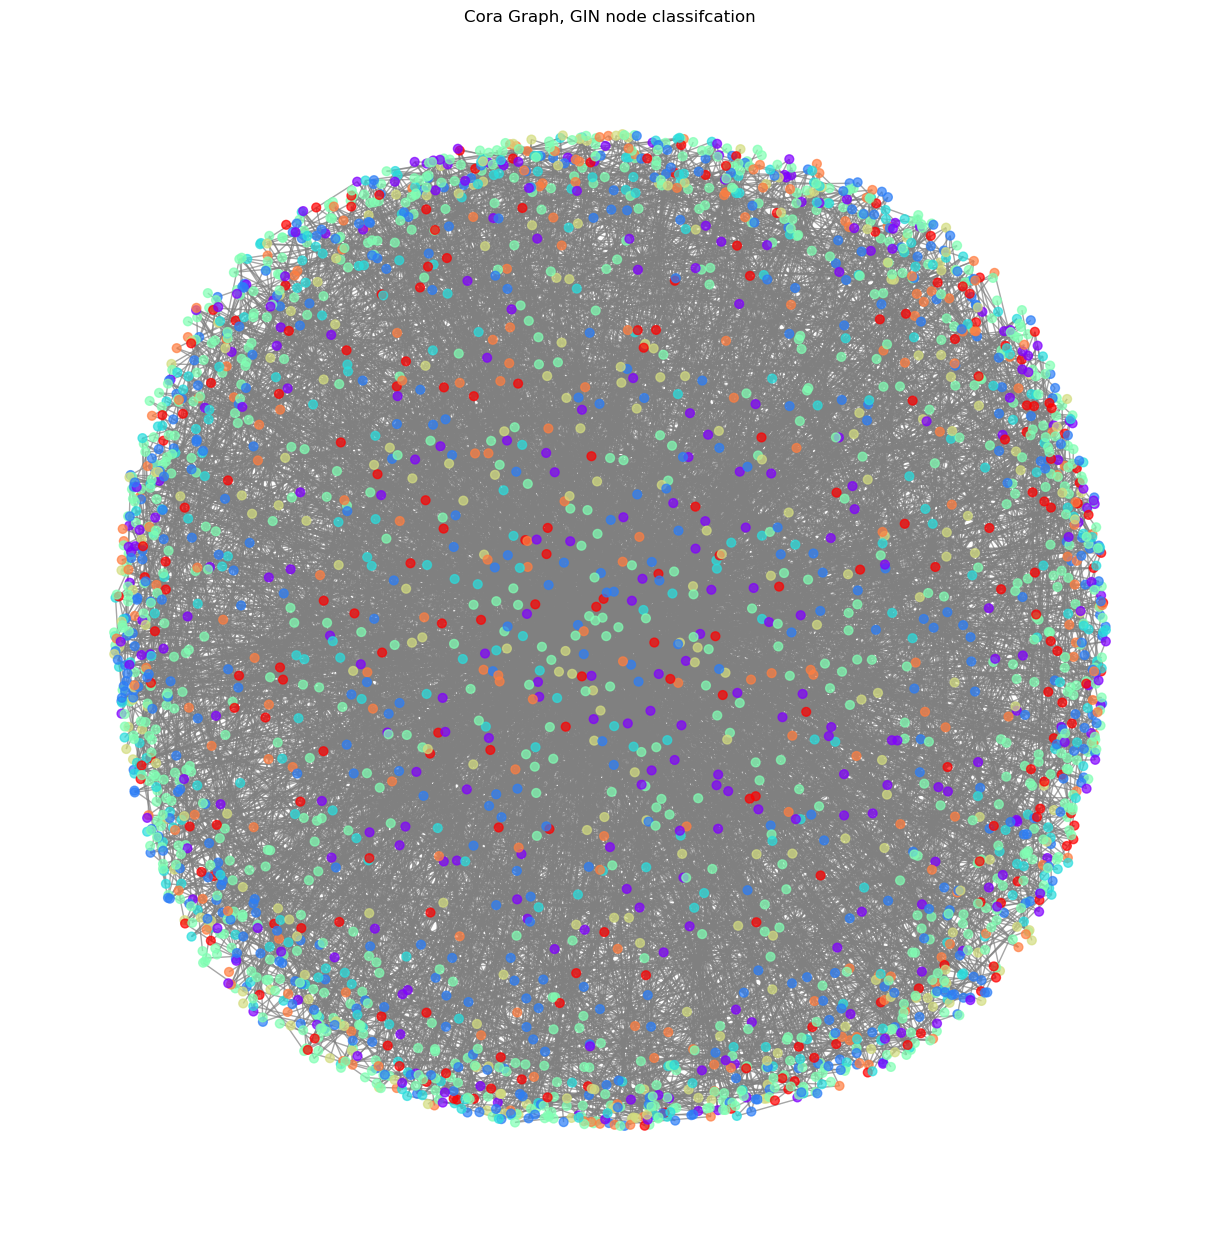

In [20]:
# graphing #
node_color = pred.cpu().numpy()
data = cora_dataset[0]
G = helper_funcs.visualize_by_pred_class(pred, data, 
                                         title="Cora Graph, GIN node classifcation")

## Graph classifcation: IMDB

In [21]:
# split imdb data to train/test loaders
train_loader, test_loader = helper_funcs.preprocess_data(imdb_dataset, 
                                                         onehot=True, 
                                                         batch_size=64)

In [22]:
# init model
imdb_model = gnn.GINGraph(in_channels=imdb_dataset.num_node_features,
                 hidden_channels=64, 
                 out_channels=imdb_dataset.num_classes,
                 num_layers = 10)
optimizer = torch.optim.Adam(imdb_model.parameters(), 
                             lr=0.01)

# Training the model
for epoch in range(EPOCHS): 
    train_loss = gnn.GINGraph_train(imdb_model, train_loader, optimizer)
# evaluate
test_acc = gnn.GINGraph_test(imdb_model, test_loader)
print(f"Final Accuracy on IMDB_BINARY: {test_acc:.4f}")

Final Accuracy on IMDB_BINARY: 0.8063


## Graph classification: ENZYME

In [23]:
# set up dataset
train_loader, test_loader = helper_funcs.preprocess_data(enzyme_dataset, 
                                                         onehot=False, 
                                                         batch_size=64)

In [24]:
# init model
enzyme_mdl = gnn.GINGraph(enzyme_dataset.num_features,
                          32,
                          enzyme_dataset.num_classes,
                          num_layers=4)
enzyme_mdl = torch.jit.script(enzyme_mdl)
optimizer = torch.optim.Adam(enzyme_mdl.parameters(),
                             lr=0.00002,
                             weight_decay=1e-5)

# train model
for epoch in range(EPOCHS):
    loss = gnn.GINGraph_train(enzyme_mdl, train_loader, optimizer)

# evaluate on test data
test_acc = gnn.GINGraph_test(enzyme_mdl, train_loader)
print(f'Test Acc: {test_acc:.4f}')

Test Acc: 0.5646
